In [2]:
import pandas as pd
import numpy as np

In [3]:
pip install seaborn

     |████████████████████████████████| 292 kB 7.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [8]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 8.3 MB/s            
     |████████████████████████████████| 233 kB 59.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [9]:
import statsmodels.api as sm

In [10]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 24.8 MB 8.3 MB/s            
     |████████████████████████████████| 306 kB 57.6 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=9b350df6518f4fffda566b8aed739af69148283bb32ce0e4cf8fb977c34a5cd8
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn import linear_model

In [12]:
df = pd.read_csv("Titanic.csv") #Abrir csv
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [14]:
df.rename(columns = {'sex' : 'Sex',
                     'age' : 'Age',
                     'sibsp' : 'Siblings','parch' : 'Parents/Children','fare' : 'Fare','embarked' : 'Embarked','class' : 'Class','who' : 'Category', 'alone' : 'Alone', 'survived' : 'Survived'},
          inplace = True)
df.head()

,Sex,Age,Siblings,Parents/Children,Fare,Embarked,Class,Category,Alone,Survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


# What type of passenger is more likely to survive the Titanic sinking?

In [7]:
#Question 1
question1 = pd.pivot_table(df,  
                           index=['Class'],
                           values ="Survived",
                           columns='Category',
                          aggfunc="mean"
                          )
question1

Category,child,man,woman
Class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


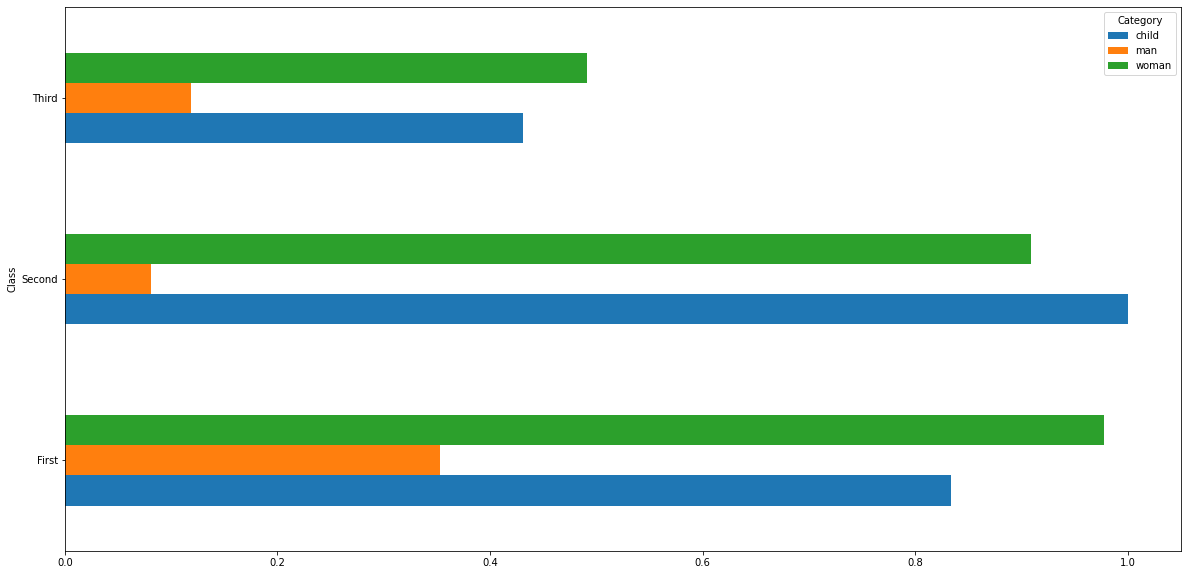

In [8]:
question1.plot.barh(figsize=(20,10))

# What is the average fare paid per class and gender?

In [9]:
#Question 2
question2 = pd.pivot_table(df,
               index = "Class",
                values = "Fare", 
               aggfunc = "mean",
                           columns='Sex',
              )
question2

Sex,female,male
Class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


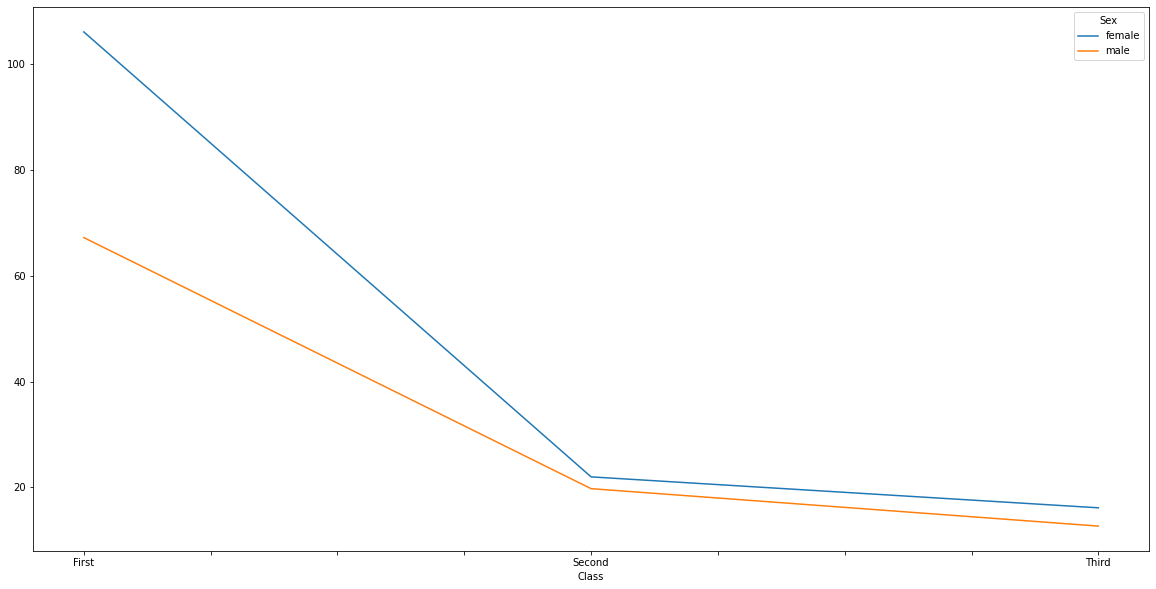

In [10]:
question2.plot(figsize=(20,10))


# How many passengers boarded the Titanic at each port? (In %)

In [11]:
counts = df['Embarked'].value_counts()

In [12]:
type (counts)
counts = counts.to_frame()
type (counts)

pandas.core.frame.DataFrame

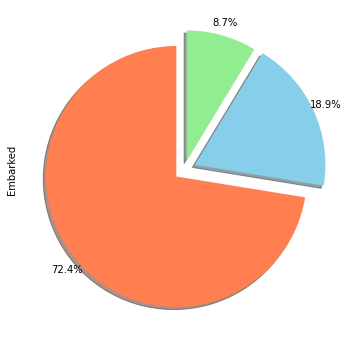

In [13]:
#Question 3
x = list(counts ['Embarked'])

explode_list = [0.08,0.09,0.07]
color_list = ['coral','skyblue','lightgreen']
counts['Embarked'].plot(kind='pie',
                  figsize = (15,6),
                  autopct='%1.1f%%',
                  startangle = 90,
                  shadow = True,
                   labels = None,
                   explode = explode_list,
                   colors = color_list,
                  pctdistance = 1.1)

# How does traveling alone affect passenger survival rates?

In [17]:
#Question 4
question4 = pd.pivot_table(df,  
                           index=['Alone'],
                           values ="Survived",
                          aggfunc="mean"
                          )
question4

,Survived
Alone,
False,0.505650
True,0.303538


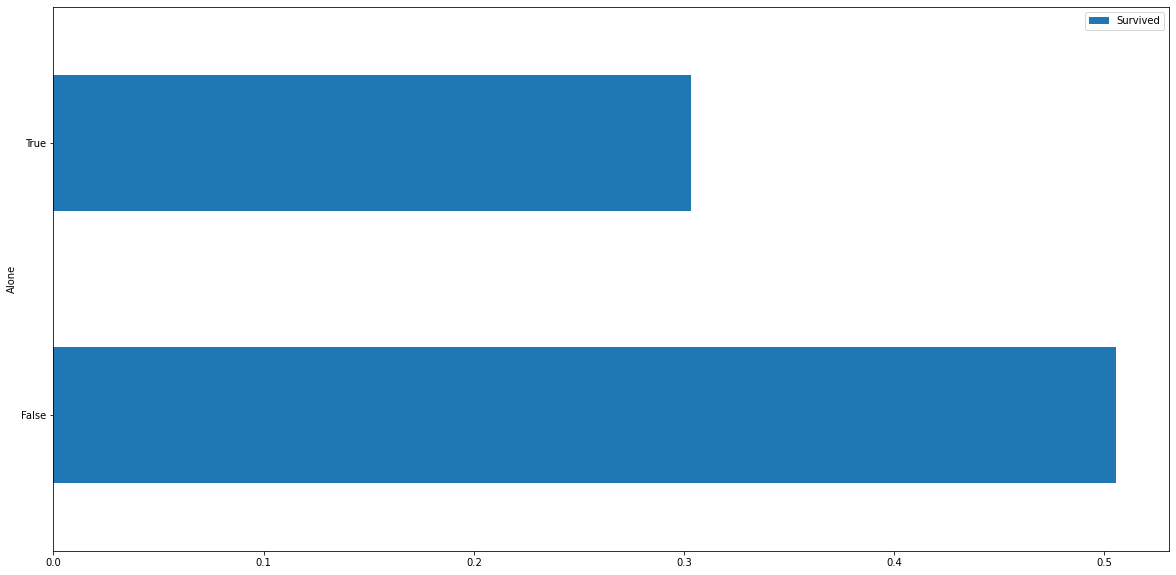

In [18]:
question4.plot.barh(figsize=(20,10))

# What were the most common ages among the passengers?

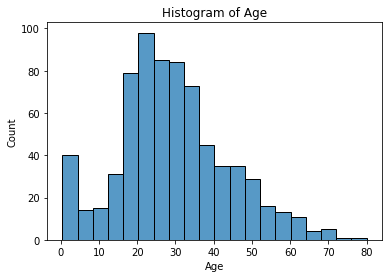

In [23]:
#Question 5
sns.histplot(x = df['Age']
           ).set_title('Histogram of Age')

plt.show()

# Does age have any atypical data?

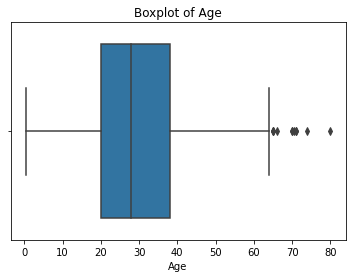

In [26]:
#Question 6
sns.boxplot(x = df['Age'],     
           ).set_title('Boxplot of Age')
plt.show()